<a href="https://colab.research.google.com/github/AMerrington/sense-hackathon/blob/leopauly/SENSE_CDT_Practical_Session_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Description
print('Automated Sentinel-1 Ice, Water, Land Segmentation Challenge')
print('Model training for patche classification')

Automated Sentinel-1 Ice, Water, Land Segmentation Challenge
Model training for patche classification


In [14]:
## Imports
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import torch
import torch.nn as nn
from torch import optim
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import keras

In [3]:
## Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
## Setting variables
SAMPLING_DIR ='/content/drive/MyDrive/png_samples_200x200/'
META_DIR ='/content/drive/MyDrive/tiff_sample_metadata/meta3.npy'
SAV_DIR='/content/drive/MyDrive/PolarNet/'
TRAIN_SIZE = 0.7
VALID_SIZE = 1.0 - TRAIN_SIZE
LABELS = {"L": 0,"W": 1,"I": 2,}
n_classes=3
total_samples=2513 # Change to 2513 for final training
test_size=.1
nb_epoch=10

In [5]:
## Checking dataset in drive
print('Patches details:')
print('Number of image files (patches)',np.shape(os.listdir(SAMPLING_DIR)))
#print(os.listdir(SAMPLING_DIR))
print('\nMetafile details:')
meta=np.load(META_DIR)
print('Meta file size:',np.shape(meta))
#print('patch ID:',[row[0] for row in meta])
#print('x_cord:',[row[1] for row in meta])
#print('y_cord:',[row[2] for row in meta])
#print('labels:',[LABELS[row[3]] for row in meta])

Patches details:
Number of image files (patches) (2513,)

Metafile details:
Meta file size: (2513, 4)


In [6]:
## Loading dataset from drive
x=[]
x_list=[row[0] for row in meta]
for index in range(total_samples):
  x.append(np.array(Image.open(SAMPLING_DIR + str(x_list[index]) + ".png")))
x=np.array(x)
#print('image IDs in x:',x_list)

y_=np.array([LABELS[row[3]] for row in meta])
y=y_[:total_samples]
#print('labels in y:',y)

print('Datasets(x,y) loaded from disk')
print('Checking shapes x,y:',np.shape(x),np.shape(y))

Datasets(x,y) loaded from disk
Checking shapes x,y: (2513, 200, 200, 3) (2513,)


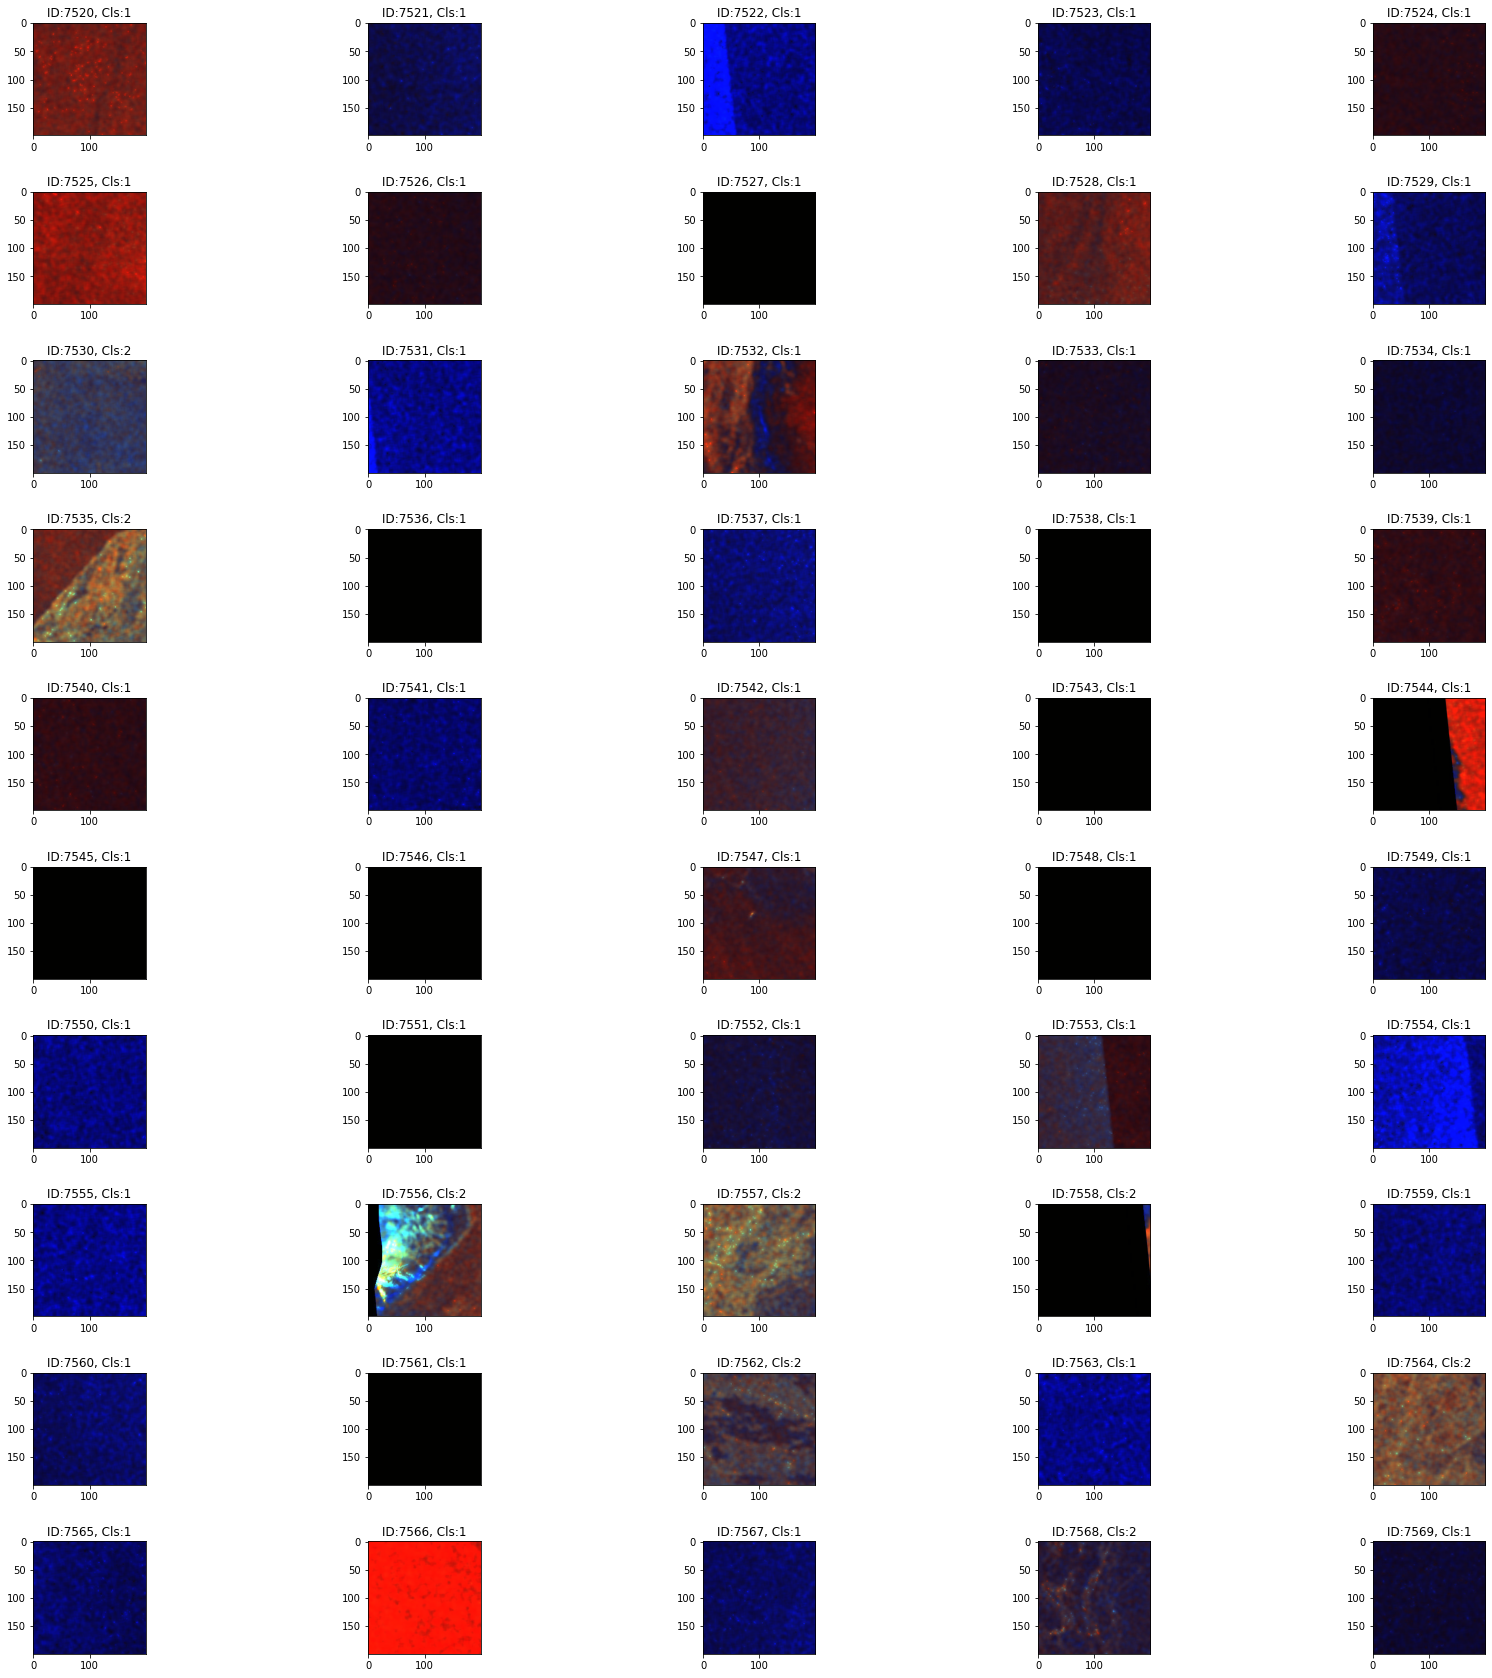

In [7]:
## Data visualisation 
fig, axs = plt.subplots(10,5, figsize=(30, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(50):
    axs[i].imshow(x[i])
    axs[i].set_title('ID:{}, Cls:{}'.format(x_list[i],y[i]))


In [8]:
## Splitting data into train and test
y=to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
print('Checking training dataset (x,y) shapes:',x_train.shape,y_train.shape)
print('Checking testing dataset (x,y) shapes:',x_test.shape,y_test.shape)

Checking training dataset (x,y) shapes: (2261, 200, 200, 3) (2261, 3)
Checking testing dataset (x,y) shapes: (252, 200, 200, 3) (252, 3)


In [10]:
## Creating model
def modelling(model_id):

  ## Model 1 (CNN with 32 fileters in layer 1)
  if (model_id==1):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(200,200,3)))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))

  ## Model 2 (CNN with 64 fileters in layer 1)
  if (model_id==1):
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(200,200,3)))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    
  return model

In [11]:
model_id=1
model=modelling(model_id=model_id) # Change model ids to change models 
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=nb_epoch)

Epoch 1/10
71/71 [==============================] - 68s 941ms/step - loss: 4861.3201 - accuracy: 0.5107 - val_loss: 96.5519 - val_accuracy: 0.6627
Epoch 2/10
71/71 [==============================] - 66s 933ms/step - loss: 59.7884 - accuracy: 0.6728 - val_loss: 22.5585 - val_accuracy: 0.6667
Epoch 3/10
71/71 [==============================] - 66s 933ms/step - loss: 8.7351 - accuracy: 0.7242 - val_loss: 8.4447 - val_accuracy: 0.6230
Epoch 4/10
71/71 [==============================] - 66s 934ms/step - loss: 1.7233 - accuracy: 0.7748 - val_loss: 7.2130 - val_accuracy: 0.6587
Epoch 5/10
71/71 [==============================] - 66s 933ms/step - loss: 0.9648 - accuracy: 0.8169 - val_loss: 4.5598 - val_accuracy: 0.6548
Epoch 6/10
71/71 [==============================] - 66s 932ms/step - loss: 1.0052 - accuracy: 0.8229 - val_loss: 4.4646 - val_accuracy: 0.6230
Epoch 7/10
71/71 [==============================] - 66s 933ms/step - loss: 0.5682 - accuracy: 0.8350 - val_loss: 4.0524 - val_accuracy: 

In [12]:
## Evaluation
print('Model outputs:',np.argmax(model.predict(x_test[:10]),axis=1))
print('Actual outputs:',np.argmax(y_test[0:10],axis=1))

## Saving model
model.save(SAV_DIR+str(model_id))

Model outputs: [1 1 1 2 2 1 1 1 1 1]
Actual outputs: [1 1 1 2 2 2 1 0 2 2]
INFO:tensorflow:Assets written to: /content/drive/MyDrive/PolarNet/1/assets


In [15]:
##Restore model
reconstructed_model = keras.models.load_model(SAV_DIR+str(model_id))

## Checking:
np.testing.assert_allclose(model.predict(x_test),reconstructed_model.predict(x_test))

In [16]:
!hostname

1d50484501fb


In [6]:
## Database class
class PolarPatch(Dataset):
    def __init__(self, transform=None, split="train"):
        super(PolarPatch, self).__init__()

        assert split in ["train", "val"]
        
        meta = np.load('/content/drive/MyDrive/tiff_sample_metadata/meta3.npy')

        train_dim = int(TRAIN_SIZE * len(meta))
        
        if split == "train":
            meta = meta[:train_dim]
        else:
            meta = meta[train_dim:]                   

        self.images = [row[0] for row in meta] #range(len(meta))
        self.coords = [(row[1], row[2]) for row in meta]

        # Targets in integer form for computing cross entropy
        self.targets = [LABELS[row[3]] for row in meta]
        self.transform = transform


    def __len__(self):
        return len(self.targets)

    def __getitem__(self, index):

        x = Image.open(SAMPLING_DIR + str(self.images[index]) + ".png")  # ".png") # change this file format if needed
        y = self.targets[index]
        coord = self.coords[index]

        if self.transform:
        	x = self.transform(x)

        return x, y, coord

In [7]:
## Data pre-processing (todo: normalisation)
data_transform = transforms.Compose([transforms.ToTensor()])

In [8]:
## Dataloaders
BATCH_SIZE = 2513 #todo: set this

train_set = PolarPatch(split='train',transform=data_transform)
#test_set = PolarPatch(split='test',transform=data_transform)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=BATCH_SIZE,shuffle=True,num_workers=2)

In [9]:
## Model
class PolarNet(nn.Module):
    def __init__(self, n_classes=3):
        super(PolarNet, self).__init__()

        self.features = nn.Sequential(
            # TODO: build your own architecture here; one conv layer and ReLU here as an example only
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True), 
        )

        self.classifier = nn.Sequential(
            # TODO: continue classifier section of architecture here for classification approach;
            # otherwise, remove and add in upscaling for a fully-convolutional segmentation approach 
            nn.Linear(4096, n_classes),
        )      

    def forward(self, x):
        # as an example; alter as needed depending on your architecture
        x = self.features(x)

        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [10]:
## Training
# Device configuration - defaults to CPU unless GPU is available on device
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = PolarNet().to(DEVICE)
criterion = nn.CrossEntropyLoss()

# Stochastic gradient descent - TODO: alter as needed
optimizer = optim.SGD(model.parameters(),lr=0.001,weight_decay=0.0005,momentum=0.9)

In [ ]:
nb_epoch=2
for epoch in range(nb_epoch): 
    
    running_loss = 0.0
    
    for data in train_loader:

        ## Reading data
        inputs, labels,_ = data
        print(inputs.shape)
        print(labels.shape)

        ## Forward pass+backward pass
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

print('Finished Training')

In [ ]:
## Evaluation